# Sales Prediction using Linear, Lasso and Ridge Regression

In [1]:
# Importing the required libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns
from sklearn.model_selection import train_test_split #for splitting the dataset into training and testing set .
from sklearn.linear_model import LinearRegression  # forlinear regression 
from sklearn.preprocessing import LabelEncoder # for transforming the column's category 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso

In [2]:
# Importing the dataset 

Train_df = pd.read_csv('Train.csv')
Train_df.head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
Train_df.describe()  #Statistical information about that dataset

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


###  From the above observation, there are some missing data in the columns 'Item_Weight' & 'Outlet_Size' 

In [5]:
Train_df.isnull().sum()  ## Sum of missing values in each column

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
## Dealing with missing values 
Item_weight_mean = Train_df['Item_Weight'].mean()
Outlet_size_mode = stat.mode(Train_df['Outlet_Size'])
print(Item_weight_mean)
print(Outlet_size_mode)

12.857645184136183
Medium


## Missing data treatment:

In [7]:
# Replacing the nan values in 'Item_Weight' Column with the mean of the column values 
Train_df['Item_Weight']=Train_df['Item_Weight'].replace(np.nan,Item_weight_mean)
# Replacing the nan values in 'Outlet_Size' Column with the mode of the column values 
Train_df['Outlet_Size']=Train_df['Outlet_Size'].replace(np.nan,Outlet_size_mode)

In [8]:
Train_df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

### Converting the all the categorical columns into numerical columns

In [9]:
## Using the LabelEncoder to transform the categorical coulmns
x1=LabelEncoder()

Train_df['Item_Fat_Content']=x1.fit_transform(Train_df['Item_Fat_Content'])
Train_df['Item_Type']=x1.fit_transform(Train_df['Item_Type'])
Train_df['Outlet_Identifier']=x1.fit_transform(Train_df['Outlet_Identifier'])
Train_df['Item_Identifier']=x1.fit_transform(Train_df['Item_Identifier'])
Train_df['Outlet_Size']=x1.fit_transform(Train_df['Outlet_Size'])
Train_df['Outlet_Location_Type']=x1.fit_transform(Train_df['Outlet_Location_Type'])
Train_df['Outlet_Type']=x1.fit_transform(Train_df['Outlet_Type'])

In [10]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null int32
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null int32
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null int32
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null int32
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null int32
Outlet_Location_Type         8523 non-null int32
Outlet_Type                  8523 non-null int32
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


In [11]:
Train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### Normalizing the dataset using 'MinMax normalization'

In [12]:
Minimize=MinMaxScaler()
Minimize_data=Minimize.fit_transform(Train_df.drop('Item_Outlet_Sales',axis=1))
Minimize_data=pd.DataFrame(Minimize_data)
Minimize_data.columns=Train_df.drop('Item_Outlet_Sales',axis=1).columns
Minimize_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.100128,0.282525,0.25,0.048866,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333
1,0.005135,0.081274,0.50,0.058705,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667
2,0.424904,0.770765,0.25,0.051037,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333
3,0.719512,0.871986,0.50,0.000000,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000
4,0.832478,0.260494,0.25,0.000000,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333


### Setting up the dependent variable and the target variable 

In [13]:
X=Minimize_data
Y=Train_df["Item_Outlet_Sales"]

In [14]:
#splitting dataset 
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
x_train.shape

(6818, 11)

In [15]:
x_test.shape

(1705, 11)

### Fitting simple Linear Regression Model to predict the Item Outlet Sales


In [16]:
reg = LinearRegression()      #creating an object of the type linearRegression
reg.fit(x_train,y_train)        #we should fit the regressor to the training set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print('Reg_coef=',reg.coef_)
print('Reg_intercept=',reg.intercept_)

Reg_coef= [-1.51926293e+00 -3.99757765e+01  1.07502465e+02 -4.58793128e+02
  5.08812985e+00  3.66454869e+03  5.36366288e+02  3.33222228e+01
 -6.81859395e+02 -4.47021500e+02  2.63794877e+03]
Reg_intercept= -155.46762758108525


### Predicting the values for the test set

In [18]:
y_pred=reg.predict(x_test)  #this is predicting the values for the xtest 
print(y_test)
print(y_pred)


4931    1426.1436
4148    1201.7690
7423    1836.2764
4836    2410.8618
944     1549.9824
          ...    
4644    3235.7880
6179     555.2772
1861    2885.5772
3598     218.3824
1523    5478.2024
Name: Item_Outlet_Sales, Length: 1705, dtype: float64
[2474.11587967 2507.68004111 1826.16494939 ... 3858.40406265 -455.07578379
 5352.2501267 ]


### Calculating the accuracy, RMSE & R2

In [19]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
r2_percent=r2_score(y_test,y_pred)*100
print('RMSE= ',rmse)
print('Regressor score is = ',r2)
print("Regressor score in percentage = ",r2_percent)

RMSE=  1194.255301594053
Regressor score is =  0.5127044026662453
Regressor score in percentage =  51.270440266624526


In [20]:
Train_df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.012058,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


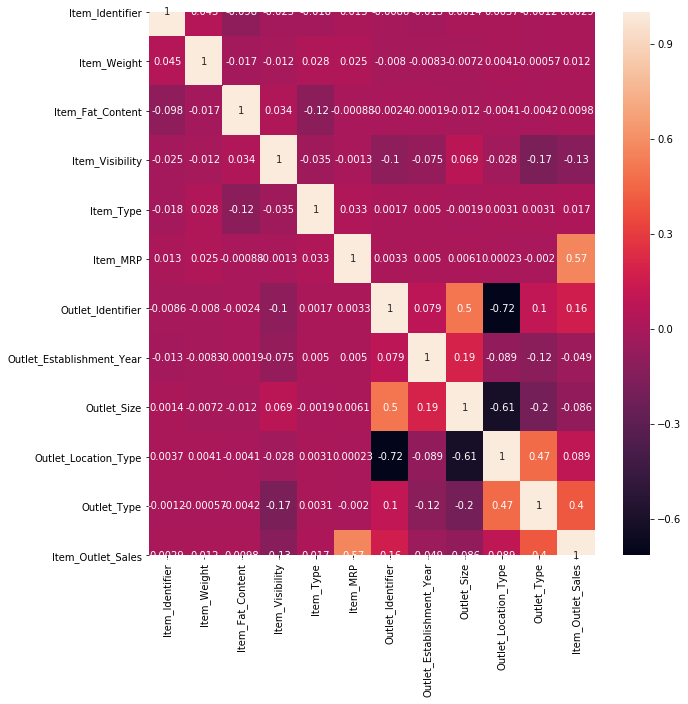

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(Train_df.corr(),annot=True)

Text(0.5, 1.0, 'Residue Plot')

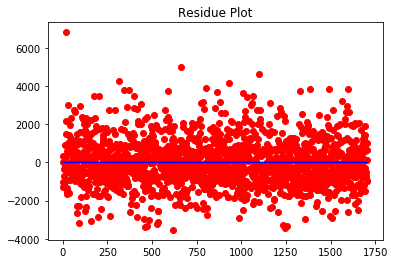

In [22]:
#Residue plot
x=[i for i in range(1,len(y_pred)+1)]
plt.scatter(x,(y_test-y_pred),color='red')
plt.plot(x,[0]*len(y_pred),color='blue')
plt.title("Residue Plot")

In [23]:
predictors=x_train.columns
predictors

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [24]:
coef=pd.Series(reg.coef_,predictors).sort_values()
coef

Outlet_Size                  -681.859395
Item_Visibility              -458.793128
Outlet_Location_Type         -447.021500
Item_Weight                   -39.975777
Item_Identifier                -1.519263
Item_Type                       5.088130
Outlet_Establishment_Year      33.322223
Item_Fat_Content              107.502465
Outlet_Identifier             536.366288
Outlet_Type                  2637.948770
Item_MRP                     3664.548691
dtype: float64

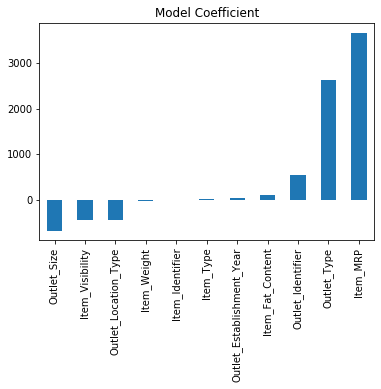

In [25]:
coef.plot(kind='bar',title='Model Coefficient')

### Fitting the Ridge Regression Model to predict the Item Outlet Sales


In [26]:
ridgeReg=Ridge(alpha=0.05,normalize=True)
ridgeReg.fit(x_train,y_train)
pred=ridgeReg.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,pred))
r2=r2_score(y_test,pred)
r2_percent=r2_score(y_test,pred)*100
print("RMSE = ",rmse)
print("R2 SCORE =",r2)
print("R2 in percentage = ",r2_percent)

RMSE =  1196.6944480174743
R2 SCORE = 0.510711865400857
R2 in percentage =  51.0711865400857


In [27]:
df = pd.DataFrame(columns = ['Linear Reg','Ridge Reg'])

for i in range(len(ridgeReg.coef_)):
    df=df.append({'Linear Reg': reg.coef_[i], 'Ridge Reg':ridgeReg.coef_[i]},ignore_index=True)
    
df

,Linear Reg,Ridge Reg
0,-1.519263,0.314257
1,-39.975777,-33.802036
2,107.502465,106.339868
3,-458.793128,-485.228874
4,5.088130,8.001519
5,3664.548691,3488.720650
6,536.366288,684.399448
7,33.322223,4.180879
8,-681.859395,-590.723556
9,-447.021500,-229.400060


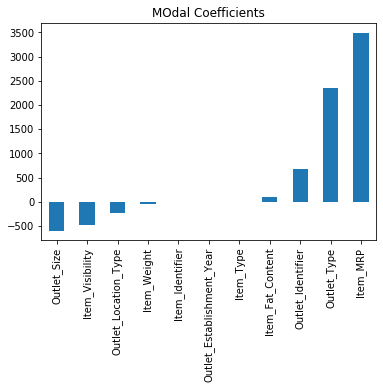

In [28]:
predictors = x_train.columns
coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar',title='MOdal Coefficients')

### Fitting the Lasso Regression Model to predict the Item Outlet Sales

In [29]:
lassoReg=Lasso(alpha=0.05,normalize=True)
lassoReg.fit(x_train,y_train)
pred=lassoReg.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,pred))
r2=r2_score(y_test,pred)
r2_percent=r2_score(y_test,pred)*100
print("RMSE = ",rmse)
print("R2 SCORE =",r2)
print("R2 in percentage = ",r2_percent)

RMSE =  1194.118492669372
R2 SCORE = 0.5128160413888398
R2 in percentage =  51.281604138883985


In [30]:
df = pd.DataFrame(columns = ['Linear Reg','Ridge Reg','Lasso Reg'])

for i in range(len(ridgeReg.coef_)):
    df=df.append({'Linear Reg': reg.coef_[i], 
                  'Ridge Reg':ridgeReg.coef_[i],
                  'Lasso Reg': lassoReg.coef_[i]},
                 ignore_index=True)
    
df

,Linear Reg,Ridge Reg,Lasso Reg
0,-1.519263,0.314257,-0.000000
1,-39.975777,-33.802036,-23.247732
2,107.502465,106.339868,82.534827
3,-458.793128,-485.228874,-445.564675
4,5.088130,8.001519,0.000000
5,3664.548691,3488.720650,3648.508064
6,536.366288,684.399448,569.496127
7,33.322223,4.180879,13.778928
8,-681.859395,-590.723556,-637.751283
9,-447.021500,-229.400060,-381.859505


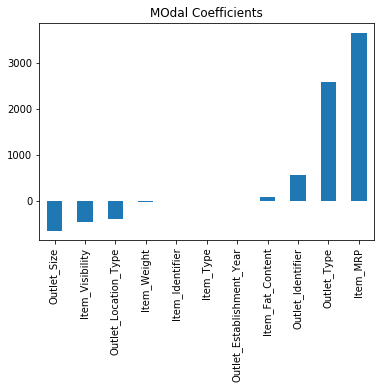

In [31]:
predictors = x_train.columns
coef = pd.Series(lassoReg.coef_,predictors).sort_values()
coef.plot(kind='bar',title='MOdal Coefficients')

# Importing the Test Dataset 

In [32]:
Test_df = pd.read_csv('Test.csv')
Test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [33]:
Test_df.describe()  #Statistical information about that dataset

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [34]:
Test_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [35]:
Test_df.isnull().sum()   ## Sum of missing values in each column

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

###  From the above observation, there are some missing data in the columns 'Item_Weight' & 'Outlet_Size' 

In [36]:
# Dealing with missing data : 
Test_Item_Weight_mean = Test_df['Item_Weight'].mean()
Test_Item_Weight_mode = stat.mode(Test_df['Outlet_Size'])
print(Test_Item_Weight_mean)
print(Test_Item_Weight_mode )

12.695633368756374
Medium


### Missing value Treatment : 

In [37]:
# Replacing the nan values in 'Item_Weight' Column with the mean of the column values 
Test_df['Item_Weight']=Test_df['Item_Weight'].replace(np.nan,Test_Item_Weight_mean)
# Replacing the nan values in 'Outlet_Size' Column with the mean of the column values 
Test_df['Outlet_Size']=Test_df['Outlet_Size'].replace(np.nan,Test_Item_Weight_mode)

### Converting the all the categorical columns into numerical columns

In [38]:
## USing the LabelEncoder to transform teh categorical coulmns/

x2 = LabelEncoder()

Test_df['Item_Fat_Content']=x2.fit_transform(Test_df['Item_Fat_Content'])
Test_df['Item_Type']=x2.fit_transform(Test_df['Item_Type'])
Test_df['Outlet_Identifier']=x2.fit_transform(Test_df['Outlet_Identifier'])
Test_df['Item_Identifier']=x2.fit_transform(Test_df['Item_Identifier'])
Test_df['Outlet_Size']=x2.fit_transform(Test_df['Outlet_Size'])
Test_df['Outlet_Location_Type']=x2.fit_transform(Test_df['Outlet_Location_Type'])
Test_df['Outlet_Type']=x2.fit_transform(Test_df['Outlet_Type'])



In [39]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null int32
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null int32
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null int32
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null int32
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null int32
Outlet_Location_Type         5681 non-null int32
Outlet_Type                  5681 non-null int32
dtypes: float64(3), int32(7), int64(1)
memory usage: 333.0 KB


In [40]:
Test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


### Normalizing the dataset using MinMax Normalization 

In [41]:
Test_Minimize=MinMaxScaler()
Test_Minimize_data=Test_Minimize.fit_transform(Test_df)
Test_Minimize_data=pd.DataFrame(Test_Minimize_data)
Test_Minimize_data.columns=Test_df.columns
Test_Minimize_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.715305,0.964275,0.25,0.023374,0.866667,0.323413,1.000000,0.583333,0.5,0.0,0.333333
1,0.691958,0.222983,1.00,0.118737,0.266667,0.235849,0.222222,0.916667,0.5,0.5,0.333333
2,0.911803,0.598095,0.25,0.307674,0.733333,0.894140,0.000000,0.541667,0.5,1.0,0.000000
3,0.524643,0.164335,0.25,0.047548,0.866667,0.524488,0.222222,0.916667,0.5,0.5,0.333333
4,0.767834,0.484706,0.50,0.366458,0.266667,0.862069,0.555556,0.000000,0.5,1.0,1.000000


In [42]:
# Prediction using the Normal Regression Model

In [43]:
y_pred_new=reg.predict(Test_Minimize_data)

In [44]:
for i in y_pred_new:
    print(i)

2104.8132211333823
1217.8446836387116
2215.403495951485
2233.2611936607905
5018.041742628271
1818.0310373923367
1211.10896956265
2743.861113415794
1474.5021639238064
2744.0281158968296
1510.5718702304662
1307.605454402492
2423.264589536923
2243.8146640758755
595.4001423066308
2744.408319208287
3122.786668443656
3476.309901881632
3175.476145405816
1331.292988185878
2440.081745274653
3185.9429262876174
668.041526400311
1095.8657847890458
2471.562777991648
1844.5505273465033
405.1070151988537
2452.648908155006
3781.5991900690096
1472.8622445629208
-683.779835863181
3585.6152851322577
1190.0668423576394
4894.378580283683
2261.0944870630997
4721.188570908425
2643.8387152772925
297.0565738441298
2679.887558089045
3094.5990554925975
2715.2591150722733
263.5771492913197
2292.38098064351
2771.4617644812743
1904.8822333926992
1427.1529391447898
-955.4284165010904
2498.012777825971
3403.0970885868974
1877.9158795813214
845.7307439827672
1342.242999885293
2608.8306852449728
1594.4798138357985
4419

1836.2989890440883
1090.5292741439525
2661.4322754855157
1115.5852801019182
1368.4374193144035
1480.326817878325
4564.48525947249
272.3827961035526
3138.5931143747816
877.8007511008423
3084.2248218494283
2044.6245035580218
3600.5611718785817
2931.9261678661
970.0944659146578
1822.4848305343492
1696.9094430500397
3209.9493503784965
3772.902436073549
1467.320221650132
1375.7698250892086
1889.3058504835567
3480.6228383434036
1746.422252552407
1748.8634497942955
1993.5240954849373
2014.397473797932
3436.887625871452
3284.1830650702723
1505.89058560281
1753.810503590697
2521.1575691337753
558.1568770480008
406.94994968231254
4430.554642736579
3388.599661056003
1512.0111476471493
2007.3244864564635
2703.9515452472197
3303.337302464224
2118.0183075396053
387.1574177037352
2956.5218897580417
2761.329845153762
2748.590597487741
1541.5382632380217
772.8537113708323
2331.7657542745574
3425.839067479439
2887.6846140946946
5028.983056755782
661.6163794723656
423.1383700741069
738.6470536168015
692.

870.322466079931
1717.4114183984752
2385.4635743412446
1705.1493891811974
1298.150165442175
4237.840080958018
2864.647662635714
1447.067818846434
1483.3740588949374
3335.1965094833595
226.2982718987011
790.6601379901301
1579.3712597056513
1441.0475050471177
3170.1440115183173
209.35484131724064
3462.9248184579137
1645.2120775187752
3657.630319200609
3653.320673345187
1554.350820621639
2604.880599332914
847.1137173584625
1139.9233885237647
2263.168968325904
2078.451970337872
2856.7114922188316
3195.522904993179
2460.041654320021
1894.733546117639
1805.5616595838226
2910.68691405763
3330.3827211155854
2417.9196000292413
1277.1477836686227
2766.7739409583437
2885.701318039103
2925.2519672451376
1635.1834113382936
1832.7062230307556
1114.0853678149465
3165.2938977551444
590.9053544576772
-305.6507412040612
2240.6146596781955
1230.7473877252385
1334.9773121526537
2246.167965080622
3875.5553692012213
2032.4844542692317
4214.727013848293
4484.885064788407
2378.676163952812
1215.6828434666397


2803.250673241064
2645.1549009601094
1115.846842909211
2551.633613146323
2013.0073502383261
1050.7060590894519
5457.562987872682
1428.786053837024
3955.078000224773
1085.0370940518424
3399.191502933438
3279.157220818311
3011.143366020705
1135.7066517616129
3230.0171834276343
2139.065910829174
1790.7844578247905
735.745535740996
3339.1151841121377
853.5517740912052
716.9550697774282
603.5285733928052
1492.2237605776074
4487.941357954208
1333.4466666928477
1399.0603575906507
3734.9803994795257
2069.26654770251
2365.5857782884536
1983.9172809508318
1285.7644026591395
2203.26665102123
3166.093658387307
1035.393331366277
-202.43131110948423
2585.6820460095432
2016.0923292653843
2354.9163907875127
838.5581463894405
3674.846808006853
2664.1881517482925
2971.016196734997
1787.5126630672275
1226.5796311869976
803.7435223605036
1983.3829580917422
1651.1911538727124
3172.6487901403134
411.22742292593375
1876.357442972234
2682.369028265057
1546.474745603633
2924.732512181711
1867.032188949392
2314

1695.9568694059337
3793.548204097074
1074.3752200262245
1452.6854740790006
1916.8653001306634
2282.482520762165
2728.2420244306845
1992.96624803538
2626.148589109998
2786.690258158391
3378.34800816437
1967.1858493555096
2965.3779333578927
2479.3769659998666
1263.0815904459487
2702.728185696693
1646.7128461294128
3510.752884875013
3742.041410162409
2896.518588007113
2195.8090745396553
279.58742419582234
3970.9302746135972
2848.7250228049093
193.8652998280612
1206.2427010663584
1092.2550412156772
530.8547608843937
1075.8115349889786
3033.529415528415
2783.8441691514317
2361.612867623205
3962.4807000474784
1905.7457625039256
1355.2769936391817
2891.357719163332
800.415082577319
2884.1431531302323
2613.7515152730143
1859.9365648632488
392.26077647824286
1358.5663912871687
3480.172052803696
2340.8223764293566
2651.7049306702843
2811.249034614437
2815.1740155988437
3559.7763552567767
3057.11336847116
3604.517867164822
1063.217325469478
3162.128191409055
2157.4871775131287
1181.920653469916
2

2343.844224549059
3333.7899122956624
3895.2450714001393
2991.512219574373
3086.4924620851525
2726.443666875863
1798.8547492586404
2424.5541144799067
683.2725217771906
396.4054077123766
2006.0545837664831
1336.0097618373818
-289.1564008912676
840.9597940263665
3982.0768078466144
1181.572517470229
1438.5829535748053
590.1496709625092
522.8830302852706
3523.83637548964
1229.685815592374
3184.7402785776985
1274.1479080983142
1145.3608077970162
3212.423852412622
1118.950923439303
2384.8212927006743
930.4657611712494
1443.752687939133
93.2602014873093
1912.0971231324816
4326.788004497631
1097.507537692793
2432.0111387026373
189.78011246930436
3196.5926257831775
673.8105928680754
2354.108438629547
2819.4169902970607
1499.6264966513563
1366.047807268896
-264.45341696123114
2478.918573445273
-657.1472691642614
1527.507710500611
118.71181945357552
3247.8242912881856
2182.3031663082234
846.6747043911139
1894.29545801643
1241.875775754831
4046.5467134152723
2589.608960028781
1992.3609737204888
365

2599.28689216776
2753.891584005054
2910.3513845205007
986.5649347720405
3015.034561632316
676.70911320652
4456.8804926254525
1528.0793662353312
317.3757643467001
2725.7046282643023
1979.3182684552548
965.7668344543638
2121.86699952482
3631.56765087663
4523.2327277206805
4067.0943745147424
1719.1918246450205
3356.9858347872446
3185.2346023003433
3938.6348005241634
3139.319958295327
1622.2103026968366
3210.660958828002
2187.127482028836
3138.1545578167297
1272.9438281697082
-33.51307613278033
4336.356761690205
3383.327828593352
1376.165277551868
4020.200511676295
2232.4982987543362
670.8124697365755
1367.2871645110433
2267.7899857866714
3018.3378081345218
1866.330277478074
3190.633535356441
1240.513054343874


In [45]:
# Prediction using the Lasso-Regression

In [46]:
y_pred_new1=lassoReg.predict(Test_Minimize_data)

In [47]:
for i in y_pred_new1:
    print(i)

2091.989170947822
1179.8769421458549
2244.331982672892
2204.1593715357903
5012.9250163142315
1811.4665093040564
1217.0668045802568
2751.7091278379758
1468.9579833433597
2714.807347409336
1499.337337310187
1311.088822300594
2436.405100900881
2221.5183118110476
613.7056739316189
2714.6705888750616
3127.274467074105
3470.1395258078705
3179.923976191243
1364.599892605119
2438.1358659655
3210.13897034828
682.9142421351853
1108.9102034778925
2492.6289015325124
1858.2016561650607
430.8847385475988
2446.2732674379536
3776.544150936446
1499.5264459715663
-660.7954506315566
3566.5298024228982
1190.6538320211846
4885.679071828188
2237.429916386975
4711.171623889924
2653.922667000425
331.1725232387869
2664.111152138134
3098.880355246711
2718.2604974521446
312.6526860641946
2271.8412917459705
2767.486915433706
1928.7304351629768
1434.3549732063475
-907.088040723133
2515.6176081972276
3418.6886901507355
1884.0851840212977
845.462373831796
1350.1122308883293
2581.107210713437
1580.2758134173423
4413.

1293.1751156513185
1891.9018285465272
640.3094471492071
1841.358008978193
1836.2239966525221
1090.5022797812903
2665.8576908008813
1111.3874510169737
1362.7375246595743
1485.7864285654582
4550.255237855639
302.58811433671656
3114.325834248819
872.867026484173
3064.4474314127574
2054.831126116894
3603.4274841553975
2922.6479310176405
996.7440932118027
1851.0075011462786
1692.445567427229
3189.7446676740738
3764.636857508744
1485.1820174282827
1384.9119138404344
1892.9730233338519
3480.3814033185918
1740.6369897001032
1739.4253495518194
1994.4165721600666
1993.8118247040388
3407.126694143082
3283.043960182186
1483.661476323793
1744.8668108640177
2530.8587817443827
541.439174244148
386.5709005144254
4412.783789947876
3385.8842572089056
1492.4649904313571
2003.9354422356591
2678.137518544774
3298.3617205419223
2132.4395824847556
405.2944608675805
2945.244763598411
2731.6826152472854
2739.1081159992145
1526.241102280284
805.9051772407905
2343.053861549653
3425.058140086308
2865.099752042884

2150.7964026794425
1782.0569645777748
596.6885932282723
526.6470148166999
4826.7316139664745
2965.1243051155784
1738.3665553502813
233.91251649742526
831.6012416852125
2006.1216616688325
3114.455383834503
772.6824044133095
1677.5821205493212
807.324029134233
2554.561183565371
3161.1724249304734
713.1738570562503
228.83316938890022
4035.921223658267
1908.0905588925266
1860.7245840617193
2777.502864667279
3486.4704932677464
689.2630485677926
1019.0363687791869
2378.3545168209116
1552.4564122131578
1093.7277721360333
248.7406284324528
1794.7567814880156
99.93553571589132
502.3153518278116
-49.549315149144775
1020.4081041385937
1265.8706588966284
3105.642633682777
3127.8907629154437
3013.6117431066737
1160.1686187831779
4112.442936717195
1951.0016164434974
1337.3412521439866
1399.2345979149075
3101.4682493407386
2416.88239327207
342.109547997092
3238.540835290563
1292.4146915200397
2948.517170782356
2164.4401403333673
2383.136760590762
2095.6863018025165
4259.25411569667
2264.6711820692453

2056.285619430718
2570.5330769328857
3735.318093184899
1851.230183453524
2552.9393443659296
3343.2014042407523
1042.2612870393561
1168.4016765786098
3728.1661851595377
2726.1971905495434
3532.57836755406
1391.0122868715277
2558.8978489293663
2615.5482952118423
934.1838095554449
302.69124866575066
2626.658256235256
1223.0673304752574
3731.1074689263983
2197.617734172601
1563.6801488488818
1026.4991108076272
448.367808235982
2390.9426375547523
3140.1507384838915
3821.68626039612
1671.4454538151408
1770.4489693511196
2536.062285632371
3603.637511780256
3310.6853538382607
3853.020044042109
524.3622269265301
2219.8422744305435
1015.7805779804482
4572.569327628334
3723.348384828754
-308.24307643520706
2237.0053710240204
2870.9576056622896
16.771334409362964
-365.02705864811173
1338.699644053672
2629.8876159622178
3735.9270389957755
2565.1202683002452
3506.5668041203235
4.602783201700106
3894.393340087669
588.8282015687121
624.9771418283146
1921.271871198432
523.0146072082192
2381.19702112669

2316.9371911889234
1682.021171698988
2458.565709497751
1313.9729658389524
1260.4695163504703
986.1337472544499
2262.9663136948707
1459.7287670774645
3587.8026880658103
1845.1004293964759
1447.5173783984085
572.1631459649889
1445.6210227470065
1166.0616981988517
3092.5803046388064
1527.9795500045418
3174.4575783933883
3060.6588516324755
980.3325716490283
1775.9405297003689
2416.492436940426
2965.5105902825735
2632.876349417152
1948.5095302658847
259.2912138967198
3853.3418606362266
3104.9108151042824
3294.7887636535825
2897.287526433219
493.55652282451797
1975.6181822267663
3284.2647742262357
2887.457524599247
2680.75730903859
3500.38899170563
3302.242133627575
324.18986816963707
1927.3443216372984
82.10902595659945
1721.0813312992364
1284.9109962634323
4383.644377639806
1007.0549641389991
2801.0036517139256
3714.473503423405
3678.4189104260945
989.7237388653559
974.2926101940636
1692.1273515327691
2819.1811958654644
4498.9371018886795
1402.95412620053
3727.675098450882
1135.97981821512

2167.4424786419327
1825.0653523324102
2351.7021739563243
2233.7825824930924
1879.8130734877886
1788.0940326146979
2073.3711155845294
1276.6683167981332
1054.2105901236037
2978.4999105669094
2076.6156701863183
3215.7408612691493
1474.6076017135315
3984.7036991117566
2555.22944359643
2046.7608341251644
2627.475226668661
594.7723046033585
753.424018752212
1825.5895232330322
2207.3599307739128
2021.0902009383444
1622.3713094077962
681.0308951981132
1233.6744209474293
77.0833524694213
1912.6241114498762
3879.4490155653057
788.9593278157585
1205.425550640821
-588.5220755420165
1712.668680703563
1303.1116254591677
2847.2073843655417
2243.810177149571
930.5344296683159
1228.9720239120372
1310.2556750161425
1017.5842873168053
2544.2664693552565
2690.9325741505404
1947.1828068093296
505.7797385233032
2154.070979293987
-761.1693005982938
2551.5932184329995
2247.410525966205
2356.282209897091
910.236644191541
2606.5158447020963
5366.733939268415
358.616872352227
679.6999794699461
3951.832146565288

In [48]:
# Prediction using the Ridge-Regression

In [49]:
y_pred_new2=ridgeReg.predict(Test_Minimize_data)

In [50]:
for i in y_pred_new2:
    print(i)

2097.827542915164
1200.454958628647
2262.065425580224
2168.9537233629844
4885.201661551955
1824.5994916961945
1251.1508639005424
2732.640896030909
1533.2942380468498
2652.8611102275536
1468.7710413349055
1374.7917759554803
2373.1759455274846
2210.6812834045018
680.6697829740818
2689.9873513740968
3114.88755311453
3415.234088272364
3144.8634154492934
1404.5714019546558
2421.9571557474005
3163.977017107597
728.2364169240687
1131.7007657167046
2505.8195520676313
1917.2702394068037
536.6114681791449
2424.1990252920937
3693.891716588546
1552.1589960744511
-568.8495108822169
3521.004306116733
1242.5952202900778
4781.6926038697875
2180.553249111697
4619.885354648428
2629.3139390117253
438.47619056899407
2585.576254049011
3069.587621652859
2693.2570610844905
407.4128609207812
2201.054920737457
2747.8201948362257
1967.568078570118
1455.4305015685059
-788.21895275888
2526.2946255702896
3374.263861585112
1883.1206809954901
894.9848958303767
1377.6060833442034
2523.23050551265
1550.6242321903483
4

1690.9108906319855
1711.9982964891794
3186.3367115045708
2898.47241631044
3217.721530076335
3243.5434593840705
2900.617132022444
2104.389821459144
1704.0200727646113
4770.611602519086
1787.844166276541
1187.77872298325
605.0817515439226
1197.3353916877406
1080.1739114418838
1833.733849787101
3764.890619270803
4178.78435083506
2141.5126407795433
872.385919621654
1892.334321185776
1131.0072534543538
1981.1789436539098
622.4426614125942
1451.735182221203
146.8438444857756
1894.3576089813273
2217.4119202694114
2978.9320911262557
1971.5376760390968
1148.2478982119098
3125.4013655692847
1762.0992988267878
689.4035919999142
1809.8908208947519
1822.079975063215
1103.9265490904452
1606.2849165119233
1828.232796113877
44.605080027669715
1869.2665826153084
2399.920629589596
1487.5230963943673
3718.2737234096567
1210.0560252916505
2148.4296308043895
4137.264546803939
2484.4778041374057
1793.0532310266215
2308.7512341919555
2195.5005477649684
2896.7541894897777
1118.2917957720422
1836.8350431619824

2006.195689106818
2574.142594002076
3911.8785568843737
2893.26934530971
2688.352051306107
552.4458630766986
3351.5343436600297
2921.061057888438
635.4009835275941
2933.7763611362398
1258.224970840658
1594.5751352953775
1465.7777988836883
3936.2552049758565
1600.2264402713718
2177.8514225648096
3579.615396939102
1627.5117262214585
2891.6313795500123
2542.571390862901
3423.3971128887265
1496.6067570544947
1133.3728918145287
1428.0948274323646
3824.6193976048753
1375.7697523702564
4635.175042647799
1120.593347672909
1217.1034941361982
1370.9493482852984
1245.1239478053915
361.30701043162435
2829.38156399914
5153.679962311893
2443.3242174803963
2478.6446112192584
1511.5674704554708
837.2629634264804
1640.0691936296514
3232.6686476152713
2571.25478071185
2069.2036591759756
4325.902256937306
1999.2960075618566
2810.996227108995
-453.1034857478533
793.9872232799822
1487.7011377993545
2712.9331637083947
1494.5768080709727
1680.7363361357916
2010.2620814278762
-503.39899466416074
1851.257036340

2772.6983668524836
1041.2526618937295
902.9522356521745
1964.624169584114
1117.110182607754
2379.3195488587057
2017.8992424932962
4223.959437566889
3812.8881189450253
1045.974100086386
2380.1713085886668
2990.44776524012
2156.654904692625
724.715905757378
2961.3335005677227
-167.29929395054683
3033.288073663027
1955.1806977468304
4100.132460595074
757.5038716242182
494.2095069740577
3459.2291474985695
2594.278979189239
2665.075575864868
3442.009267997444
1663.433481511823
4728.349659106047
690.4136568190376
2605.643870013279
2076.045747453361
3042.3444082585434
3505.2430067279006
4471.776940437601
2351.407632795941
1996.2567403281428
400.11569060832414
1072.5868208565873
2771.264466102681
2495.0732909085004
4147.411304548583
2057.874836708459
1182.0962993978014
2194.1643766904435
2666.139386536289
1296.080396493197
4103.647643599023
2983.2767407616884
2040.469027402101
2723.4600158308376
1372.0693736791727
3184.0824611661274
1684.1292146355495
891.3570232342884
777.7491046245323
945.60

1137.671257501022
1899.604254537052
3595.0341773851
3027.5050949000147
1979.004713478244
2574.567097550272
3714.832861509635
1726.1729524156904
1769.3131854353894
3083.5647036831842
2221.089277663788
2785.4387071196115
972.017313484856
2448.6917608528015
2263.0135872083597
1534.036328803971
-198.1589541660611
2869.578338935288
3029.1737471797696
1953.0321475408186
2039.0168242938107
1297.101931552712
1205.2240170197906
760.3682989983594
1261.976959211362
468.17456569705234
1123.7895449499727
2797.896997352308
693.9668467891042
2321.5488868522543
2170.490647295219
875.3790542977497
2358.903440464903
3094.316006792346
2372.47354506846
2297.835106677368
2770.7502852459284
3159.458284118091
3003.6389359180653
234.82435502863586
2138.4361414828227
-24.696476851774037
2946.39062784607
3642.794674343808
1811.5778297618785
1670.0188712181223
4324.7513050967755
2731.567638945021
2066.5339459613674
2741.1457351669674
2284.325482738607
-143.34008923380907
3746.8121323168884
358.73948605339785
311

597.3498494651558
3072.4492503448178
1430.236946430072
1269.6095049562866
1518.0130609195937
190.45624820768808
1489.2604468209984
2326.8705288649794
930.9124883288084
3956.7672201338632
-258.64431796369763
4882.970262356346
1723.3517308052853
555.3716959230353
1376.539258898189
-497.5304463186593
1946.9210532180273
1040.9425835072832
1293.4293034835584
676.8644606247142
3042.348170302448
3791.638619887285
691.8980518296413
2205.0405138012466
1240.4614486504665
3804.7597055640417
782.6424995941782
1428.3654687557537
1865.0748727460946
2961.2483996981305
4658.222977982738
1183.1215708018153
3945.367690813637
3725.484668310043
3240.6935961447007
2671.488358130856
2535.840377863983
4960.518354536294
2718.815328907029
2963.36848848055
4099.194436925807
2106.1822526111587
1923.6959590501629
2182.547257252298
3357.2782686995274
2783.064663348758
2968.404912978061
1945.0954529194569
286.6517093142494
1499.7500167145445
2896.9058758490596
2507.2247833606175
912.8488087885094
767.8619825893875


2469.449890719743
2607.1193357524203
2289.8197739098464
1615.55319379935
3462.1098342919086
2632.6760215332706
1456.9191615432
725.6144159820616
1835.2280390756662
1719.670049058334
2040.1933165036403
3205.21138604188
3873.474354273936
2815.050154241753
3898.5188585025394
2576.3462477473186
3784.897889260238
3611.6916648356187
2795.566962529432
1270.6339511929905
1141.830653171347
3331.2873148523036
1720.3479578438992
1071.213940809249
1182.5597474240944
1219.3812812923672
3969.326331560084
710.0843545019986
808.1551887747372
846.4239274790639
1247.9518296525982
1353.6094585022772
3688.9165838147833
5329.131888600436
3248.550778866603
414.13069611294634
2784.0804343565974
1.0921929319522405
2495.5138869049665
1016.7707017295111
1829.6798235439694
1486.443634755022
1324.2594202966206
3221.7201076200713
1938.36667510268
2644.180283811004
2790.269426404552
1283.728449100132
801.2260784560111
1041.1493200978775
2239.5673361511544
840.7614720824699
2658.042932328849
-238.80992977904089
4091